In [51]:
import tifffile as tf
import skimage.io as io
from skimage.util import img_as_uint

from byc.file_management import select_file
from byc.alignment import translate_image

In [3]:
# Let 'path' refer to the path to the file
# you select in the tkinter file dialog
path = select_file("Select file")
print(path)

In [9]:
# Use tifffile to read the image selected above
image = tf.imread(path)

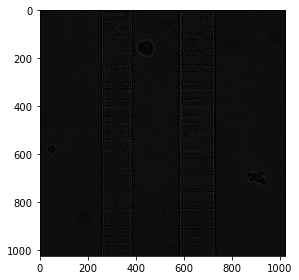

In [22]:
# plot the image
io.imshow(image[0])

In [46]:
# This loop will go through each channel in the image
# and translate it by the offset defined here, then add
# that translated channel to the list 'translated_channels'
offset = (100, 100)
translated_channels = []
for channel_index in range(image.shape[0]):
    # The translated image will be output as an array of floats. 
    # It gets converted back to unsigned integer (uint) below so
    # that it's back at the right bit depth etc
    translated_image = translate_image(image[channel_index], offset)
    # Use img_as_uint to convert each translated channel image
    # into an array of unsigned integers
    translated_channels.append(img_as_uint(translated_image))

C:\.main_env\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


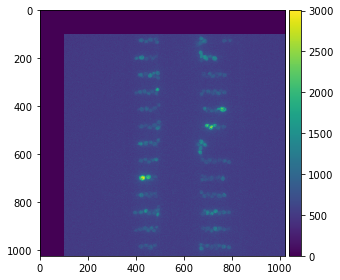

In [47]:
# Plot a newly translated channel image 
io.imshow(translated_channels[2])

In [62]:
# Use skimage.io to concatenate the list of translated channel
# images back into a stack that can be saved as a tif
translated = io.concatenate_images(translated_channels)
# Confirm that the shape of the new translated channel stack is 
# the same as the old and save it if so
print(f'shape of new image: {translated.shape}\nshape of old image: {image.shape}')
if translated.shape == image.shape:
    tf.imsave('test_image.tif', data=translated)

shape of new image: (3, 1024, 1024)
shape of old image: (3, 1024, 1024)


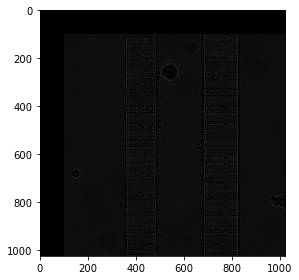

In [63]:
# Read the newly saved translated channel stack 
# and have a look at the brightfield channel
new = tf.imread('test_image.tif')
io.imshow(new[0])

In [54]:
from byc import alignment as a
import tifffile as tf
import tkinter as tk
import tkinter.filedialog as dia
import os

def set_paths():
    
    """ Return input_path and output_path, two directories chosen by the user. 
        Input_path should contain the sorted xy directories for each fov. """
    
    # Choose the directory holding all the fields of view that you'll align
    root = tk.Tk()
    input_path = dia.askdirectory(parent=root,
                                  title='Choose the directory holding the experiment you want to align')
    root.destroy()

    # ask the user where they would like to save the output stacks
    root = tk.Tk()
    output_path = dia.askdirectory(parent=root,
                                   title='Choose the directory where you want to save aligned images')
    root.destroy()
    
    return input_path, output_path

# Generate a list of directories, one for each fov directory in the expt_path
def set_fov_dirs(expt_path):

    fov_dirs = os.listdir(expt_path)
    fov_paths = []

    for directory in fov_dirs:
        fov_paths.append(expt_path + '/' + directory)
    return fov_dirs, fov_paths

def run():

    expt_path, save_path = set_paths()
    fov_dirs, fov_paths = set_fov_dirs(expt_path)
    len_channels, channel_names = a.get_channel_names(fov_paths[0])

    for i in range(0, len(fov_dirs)):

        fov_name = fov_dirs[i]
        fov_path = fov_paths[i]
        print("Aligning %s" % fov_name)

        translated_images_dict = a.align_images(fov_path, channel_names)
        a.save_stacks(translated_images_dict, save_path, fov_name)

if __name__ == "__main__":
    run()

Detected 3 channels
Enter names below:
Name for channel 0: bf
Name for channel 1: random_channel
Name for channel 2: yfp
Aligning 20200221_byc_xy00
20200214_byc_xy00_t000.tif
20200214_byc_xy00_t001.tif
20200214_byc_xy00_t002.tif
20200214_byc_xy00_t003.tif
20200214_byc_xy00_t004.tif
20200214_byc_xy00_t005.tif
20200214_byc_xy00_t006.tif
20200214_byc_xy00_t007.tif
20200214_byc_xy00_t008.tif
20200214_byc_xy00_t009.tif
20200214_byc_xy00_t010.tif
Determining rotation offset for frame 7
-0.01933732558731704
Determining rotation offset for frame 2
-0.09010042190260872
Determining rotation offset for frame 3
0.052087072282960674
Rotating image 0 of 11
Rotating image 1 of 11
Rotating image 2 of 11
Rotating image 3 of 11
Rotating image 4 of 11
Rotating image 5 of 11
Rotating image 6 of 11
Rotating image 7 of 11
Rotating image 8 of 11
Rotating image 9 of 11
Rotating image 10 of 11
Determining registration offset 1 of 11


C:\.main_env\lib\site-packages\skimage\feature\__init__.py:43: skimage_deprecation: Function ``register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\.main_env\lib\site-packages\skimage\feature\__init__.py:43: skimage_deprecation: Function ``register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')


Determining registration offset 2 of 11


C:\.main_env\lib\site-packages\skimage\feature\__init__.py:43: skimage_deprecation: Function ``register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\.main_env\lib\site-packages\skimage\feature\__init__.py:43: skimage_deprecation: Function ``register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')


Determining registration offset 3 of 11


C:\.main_env\lib\site-packages\skimage\feature\__init__.py:43: skimage_deprecation: Function ``register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\.main_env\lib\site-packages\skimage\feature\__init__.py:43: skimage_deprecation: Function ``register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\.main_env\lib\site-packages\skimage\feature\__init__.py:43: skimage_deprecation: Function ``register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\.main_env\lib\site-packages\skimage\feature\__init__.py:43: skimage_deprecation: Function ``register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead

Determining registration offset 4 of 11
Determining registration offset 5 of 11

C:\.main_env\lib\site-packages\skimage\feature\__init__.py:43: skimage_deprecation: Function ``register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\.main_env\lib\site-packages\skimage\feature\__init__.py:43: skimage_deprecation: Function ``register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')



Determining registration offset 6 of 11


C:\.main_env\lib\site-packages\skimage\feature\__init__.py:43: skimage_deprecation: Function ``register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\.main_env\lib\site-packages\skimage\feature\__init__.py:43: skimage_deprecation: Function ``register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')


Determining registration offset 7 of 11
Determining registration offset 8 of 11


C:\.main_env\lib\site-packages\skimage\feature\__init__.py:43: skimage_deprecation: Function ``register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\.main_env\lib\site-packages\skimage\feature\__init__.py:43: skimage_deprecation: Function ``register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\.main_env\lib\site-packages\skimage\feature\__init__.py:43: skimage_deprecation: Function ``register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\.main_env\lib\site-packages\skimage\feature\__init__.py:43: skimage_deprecation: Function ``register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead

Determining registration offset 9 of 11


C:\.main_env\lib\site-packages\skimage\feature\__init__.py:43: skimage_deprecation: Function ``register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\.main_env\lib\site-packages\skimage\feature\__init__.py:43: skimage_deprecation: Function ``register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')


Determining registration offset 10 of 11


C:\.main_env\lib\site-packages\skimage\feature\__init__.py:43: skimage_deprecation: Function ``register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\.main_env\lib\site-packages\skimage\feature\__init__.py:43: skimage_deprecation: Function ``register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')


Determining registration offset 11 of 11
Translating image 1 of 11


C:\.main_env\lib\site-packages\skimage\feature\__init__.py:43: skimage_deprecation: Function ``register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')


Translating image 2 of 11
Translating image 3 of 11
Translating image 4 of 11
Translating image 5 of 11
Translating image 6 of 11
Translating image 7 of 11
Translating image 8 of 11
Translating image 9 of 11
Translating image 10 of 11
Translating image 11 of 11
Saving stacks...
Saving bf stack
Saving random_channel stack
Saving yfp stack
Aligning 20200221_byc_xy01
20200214_byc_xy01_t000.tif
20200214_byc_xy01_t001.tif
20200214_byc_xy01_t002.tif
20200214_byc_xy01_t003.tif
20200214_byc_xy01_t004.tif
20200214_byc_xy01_t005.tif
20200214_byc_xy01_t006.tif
20200214_byc_xy01_t007.tif
20200214_byc_xy01_t008.tif
20200214_byc_xy01_t009.tif
20200214_byc_xy01_t010.tif
Determining rotation offset for frame 10
0.06932789320916809
Determining rotation offset for frame 5
-1.6538884343610287e-12
Determining rotation offset for frame 7
0.12643268679053388
Rotating image 0 of 11
Rotating image 1 of 11
Rotating image 2 of 11
Rotating image 3 of 11
Rotating image 4 of 11
Rotating image 5 of 11
Rotating imag

C:\.main_env\lib\site-packages\skimage\feature\__init__.py:43: skimage_deprecation: Function ``register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\.main_env\lib\site-packages\skimage\feature\__init__.py:43: skimage_deprecation: Function ``register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\.main_env\lib\site-packages\skimage\feature\__init__.py:43: skimage_deprecation: Function ``register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\.main_env\lib\site-packages\skimage\feature\__init__.py:43: skimage_deprecation: Function ``register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead

Determining registration offset 3 of 11
Determining registration offset 4 of 11


C:\.main_env\lib\site-packages\skimage\feature\__init__.py:43: skimage_deprecation: Function ``register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\.main_env\lib\site-packages\skimage\feature\__init__.py:43: skimage_deprecation: Function ``register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\.main_env\lib\site-packages\skimage\feature\__init__.py:43: skimage_deprecation: Function ``register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\.main_env\lib\site-packages\skimage\feature\__init__.py:43: skimage_deprecation: Function ``register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead

Determining registration offset 5 of 11
Determining registration offset 6 of 11


C:\.main_env\lib\site-packages\skimage\feature\__init__.py:43: skimage_deprecation: Function ``register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\.main_env\lib\site-packages\skimage\feature\__init__.py:43: skimage_deprecation: Function ``register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\.main_env\lib\site-packages\skimage\feature\__init__.py:43: skimage_deprecation: Function ``register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')


Determining registration offset 7 of 11
Determining registration offset 8 of 11


C:\.main_env\lib\site-packages\skimage\feature\__init__.py:43: skimage_deprecation: Function ``register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\.main_env\lib\site-packages\skimage\feature\__init__.py:43: skimage_deprecation: Function ``register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\.main_env\lib\site-packages\skimage\feature\__init__.py:43: skimage_deprecation: Function ``register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\.main_env\lib\site-packages\skimage\feature\__init__.py:43: skimage_deprecation: Function ``register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead

Determining registration offset 9 of 11
Determining registration offset 10 of 11


C:\.main_env\lib\site-packages\skimage\feature\__init__.py:43: skimage_deprecation: Function ``register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\.main_env\lib\site-packages\skimage\feature\__init__.py:43: skimage_deprecation: Function ``register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\.main_env\lib\site-packages\skimage\feature\__init__.py:43: skimage_deprecation: Function ``register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')


Determining registration offset 11 of 11
Translating image 1 of 11


C:\.main_env\lib\site-packages\skimage\feature\__init__.py:43: skimage_deprecation: Function ``register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\.main_env\lib\site-packages\skimage\feature\__init__.py:43: skimage_deprecation: Function ``register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')


Translating image 2 of 11
Translating image 3 of 11
Translating image 4 of 11
Translating image 5 of 11
Translating image 6 of 11
Translating image 7 of 11
Translating image 8 of 11
Translating image 9 of 11
Translating image 10 of 11
Translating image 11 of 11
Saving stacks...
Saving bf stack
Saving random_channel stack
Saving yfp stack


In [55]:
output = set_paths()

In [57]:
expt_dir = output[0]

In [59]:
fov_dirs, fov_paths = set_fov_dirs(expt_dir)

In [60]:
fov_dirs

['20200221_byc_xy00', '20200221_byc_xy01']

In [61]:
fov_paths

['C:/Users/John Cooper/Box Sync/Finkelstein-Matouschek/byc_data/example_byc_expts/20200221_byc/tifs/alignment_input/20200221_byc_xy00',
 'C:/Users/John Cooper/Box Sync/Finkelstein-Matouschek/byc_data/example_byc_expts/20200221_byc/tifs/alignment_input/20200221_byc_xy01']